*Supporting textbook chapters for week 1: 2, 3 and 4.3*

# Example 1

Suppose the problem is to find the number of radioactive atoms of uranium $N$ as a function of time given initial $N_0$ and
$$\frac{dN}{dt} = -\frac{N}{\tau}.$$
($\tau =$ decay constant), using numerical integration, for a duration of $5\tau$.

## Part (a) 
Write pseudocode for the solution, such that we end up with an array of values of time $t$ (between 0 and $N_0$) and an array of values of $N(t)$

Pseudocode:
- DEFINE variables (rate, number, tau, timestep)
- DEFINE decay function from RHS of diff-eqn
- INITIALIZE time array, [0, ..., 5*tau] at spacing dt
- INITIALIZE N array [N_0] initial, then begin decaying
- COMPUTE N[i+1] value in N array, by CALLING func 'decay'

## Part (b)
Now write the actual code

In [7]:
import numpy as np

def RHS_decay(initial, tau, timestep):
    return initial - (initial/tau)*timestep  #compute how much N changes increment over a small timestep

def solve_decay(tau, N_0, dt):
    time = np.arange(0, 5*tau, dt)
    num = len(time)
    N_vals = np.zeros(len(time)) #set the length
    N_vals[0] = N_0 #set the initial 

    for k in range(num-1):
        N_vals[k+1] = RHS_decay(N_vals[k], tau, dt)   #compute next value

    return (time, N_vals)

    #write some general array, used plutonium-239
decay_time = 14.4 #decay rate in years
dt = 1 #timestep every 1 year
init_N = 10e8
N_Plu = solve_decay(decay_time, init_N, dt)



## Part (c)
Use the results of the previous part to make a plot of $N$ vs $t$, with the help of matplotlib.pyplot

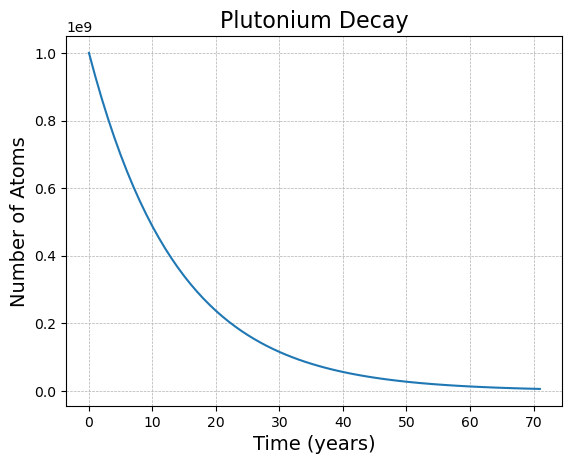

In [50]:
import matplotlib.pyplot as plt 

plt.plot(N_Plu[0], N_Plu[1])
plt.title('Plutonium Decay', fontsize=16)
plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Number of Atoms', fontsize=14)
plt.grid(ls='--', lw=0.5)
plt.show()



# Example 2

For a particle undergoing Simple Harmonic Oscillation with angular frequency 0.5 rad/s, initial position 3 m, and initial velocity 0 m/s, create a function to find its position as a function of time analytically. Then calculate the velocity and acceleration as a function of time, for 30 seconds, by taking derivatives numerically.

## Part (a)
Write the code for the analytical function

In [11]:
def SHO(time, amplitude, freq, shift):
    return amplitude * np.cos(time*freq + shift)


## Part (b)
Write the pseuudocode for a program that gives us an array of values of time $t$ (between 0 and 30s), and 3 more arrays $x(t)$, $v(t)$, and $a(t)$

Pseudocode:
- DEFINE func 'SHO' to COMPUTE particle path 
- DEFINE timestep 
- INITIALIZE time array between 0 and 30s at a step dt
- INITIALIZE x(t) array by CALLING func 'SHO'
- DEFINE func 'derivative' to compute rate of change $\frac{\Delta x}{\Delta t}$, $\Delta x$ is difference in path vals at each i, $\Delta t$ is timestep. Let func 'derivative' define the length of the output.
- COMPUTE velocity array by CALLING func 'derivative' on path array
- COMPUTE acceleration array by CALLING func 'derivative' on velocity array 


## Part (c)
Now write the actual code for the previous part

In [39]:
dt=0.1
time = np.arange(0, 30, dt)
path = SHO(time, 3, 0.5, 0)

def derivative(input, timestep):
    num = len(input)-1
    output = np.zeros(num)
    for i in range(len(input)-1):
        diff = input[i+1] - input[i]
        output[i] = diff/timestep

    return output

velocity = derivative(path, dt)
acceleration = derivative(velocity, dt)


## Part (d)
Using the results of the previous part, make 3 plots: $x(t),v(t),a(t)$

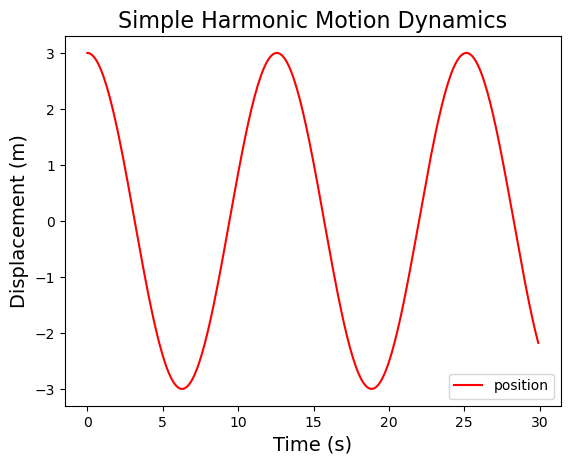

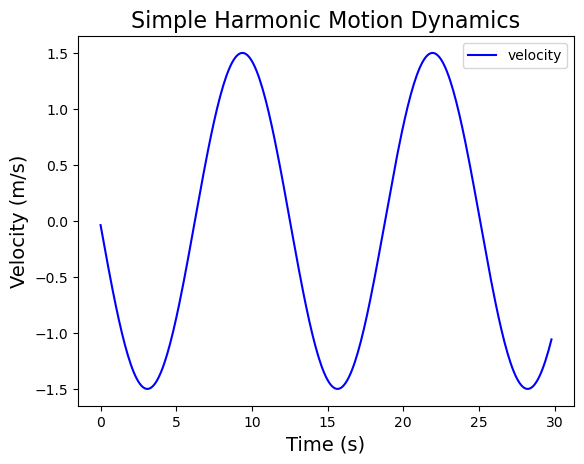

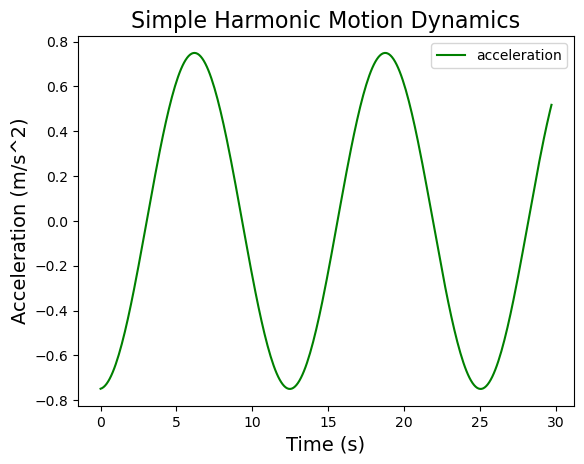

In [40]:
for i in range(3):
    if i == 0:
        plt.plot(time, path, color='red', label='position')
        plt.ylabel('Displacement (m)', fontsize=14)
    elif i == 1:
        plt.plot(time[:-1], velocity, color='blue', label='velocity')
        plt.ylabel('Velocity (m/s)', fontsize=14)
    elif i == 2:
        plt.plot(time[:-2], acceleration, color='green', label='acceleration')
        plt.ylabel('Acceleration (m/s^2)', fontsize=14)

    plt.legend(loc='best')
    plt.title('Simple Harmonic Motion Dynamics', fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.show()


## Example 3

Read through Example 4.3 on pages 137-138 of the text, which  show you that to multiply two matrices of size $O(N)$ on a side takes $O(N^3)$ operations.
So multiplying matrices that are $N=1000$ on a side takes $O(10^9)$ operations (a ``GigaFLOP''). 

## Part (a)
Create two constant matrices $A$ and $B$, then time how long it takes to multiply the matrices to form a matrix $C$ (using the code fragment in the textbook), for a range of $N$ (from $N = 2$ to a few hundred). You should end up with an array of $N$ values and an array of time values. Hint: Use python's time module. 

In [53]:
from time import time 

N = (2, 25, 50, 75, 100, 150, 200, 250, 300, 400)
times = np.zeros(len(N))

for n in range(len(N)):
    t1 = time()
    A = np.random.rand(N[n], N[n])
    B = np.random.rand(N[n], N[n])
    C = np.zeros([N[n], N[n]], dtype=float)

    for i in range(N[n]):
        for j in range(N[n]):
            for k in range(N[n]):
                C[i, j] += A[i,k] * B[j, k]

    t2 = time()
    diff = t2 - t1 
    times[n] = diff




## Part (b)
Using the results of the previous part, plot this time as a function of $N$ and as a function of $N^3$. What do you notice?

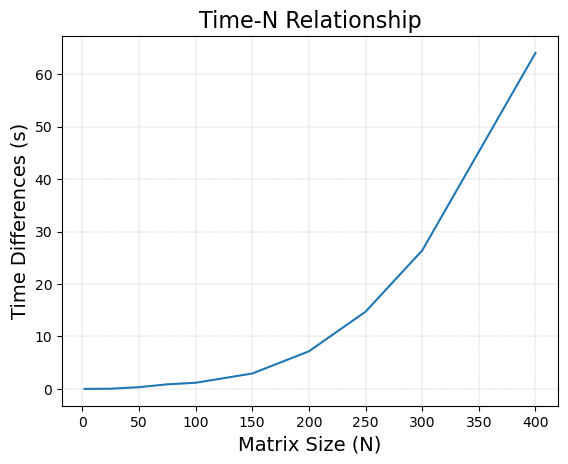

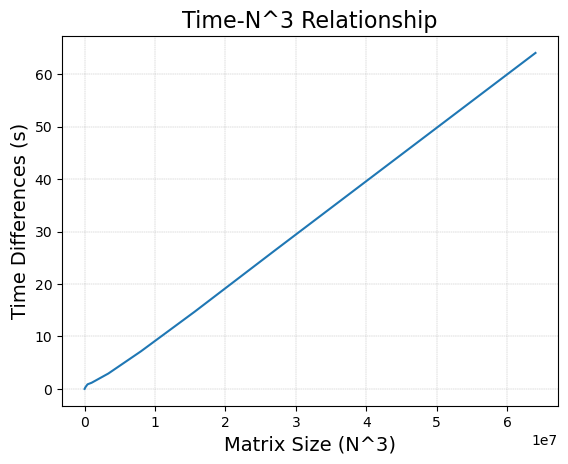

In [54]:
N_cubed = np.power(N, 3)

plt.plot(N, times)
plt.title('Time-N Relationship', fontsize=16)
plt.ylabel('Time Differences (s)', fontsize=14)
plt.xlabel('Matrix Size (N)', fontsize=14)
plt.grid(ls='--', lw=0.3)
plt.show()


plt.plot(N_cubed, times)
plt.title('Time-N^3 Relationship', fontsize=16)
plt.ylabel('Time Differences (s)', fontsize=14)
plt.xlabel('Matrix Size (N^3)', fontsize=14)
plt.grid(ls='--', lw=0.3)
plt.show()

## Part (c)
Compare your time results to the time it takes numpy.dot to carry out the same operation. What do you notice?
See http://tinyurl.com/pythondot for more explanations.

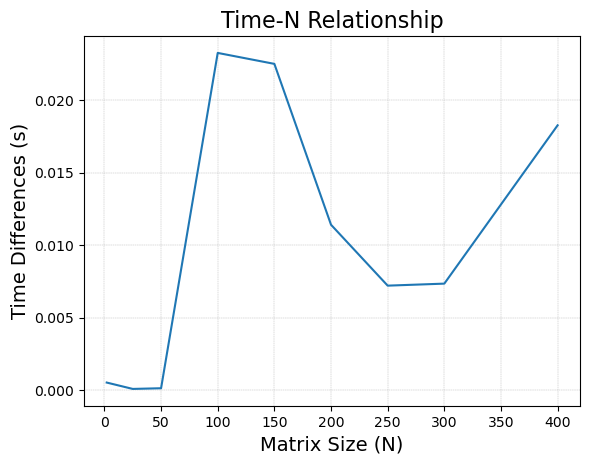

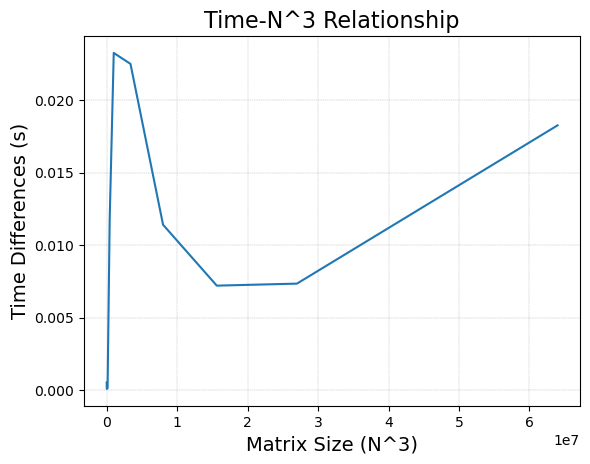

In [57]:

N = (2, 25, 50, 75, 100, 150, 200, 250, 300, 400)
times = np.zeros(len(N))

for n in range(len(N)):
    t1 = time()
    A = np.random.rand(N[n], N[n])
    B = np.random.rand(N[n], N[n])
    # C = np.zeros([N[n], N[n]], dtype=float)
    C = np.dot(A, B)

    t2 = time()
    diff = t2 - t1 
    times[n] = diff

N_cubed = np.power(N, 3)

plt.plot(N, times)
plt.title('Time-N Relationship', fontsize=16)
plt.ylabel('Time Differences (s)', fontsize=14)
plt.xlabel('Matrix Size (N)', fontsize=14)
plt.grid(ls='--', lw=0.3)
plt.show()


plt.plot(N_cubed, times)
plt.title('Time-N^3 Relationship', fontsize=16)
plt.ylabel('Time Differences (s)', fontsize=14)
plt.xlabel('Matrix Size (N^3)', fontsize=14)
plt.grid(ls='--', lw=0.3)
plt.show()

